<h1>Explore Credit Score Analysis for Mortgage Risk   </h1>

<h4>Import Python Libraries </h4>
<h5>
    1) Pandas - A powerful data analysis and manipulation library. Backbone of data science in Python since it can perform statistics and aggregations<br>
    2) Matplotlib - Essentially the "drawing engine" of Python. Many visual representations can be made - line plots, bar charts, histograms, and scatter plots among others<br>
    3) Seaborn - It is essentially an extension of Matplotlib, it is designed to make visual representations cleaner and easier to create (fewer lines of code)<br>
    4) Sklearn - An open-source library that provides tools for supervised learning (ex: regression), unsupervised learning (ex: clustering), data preprocessing (ex: scaling) and other functions <br>
</h5>

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

<h4>Read the source file and assign column names </h4>
<h5>
    1) This data was downloaded from the Freddie Mac loan website <br>
    2) This data is an annual standard loan-level dataset from 2021 <br>
    3) The URL for this website is the following: https://www.freddiemac.com/research/datasets/sf-loanlevel-dataset <br>
    4) The table below shows all of the drivers that are extracted from the file. Examples include: <br> credit score <br> cltv_score <br> and others
</h5>

In [17]:
# Read the data file and assign column names and display first 10 rows
source_df = pd.read_csv("data/sample_orig_2021.txt", delimiter = "|")
source_df.columns = [
    'credit_score', 'first_payment_date', 'flag', 'maturity_date', 'Unnamed_4','msa', 'mi_percent', 'product_type', 'num_units', 'occupancy_rate', 
    'cltv_score','dti', 'upb', 'purpose', 'property_type', 'loan_type', 'state','postal_code', 'orig_rate', 'id', 'channel', 'term', 'seller', 
    'servicer','Unnamed_25', 'Unnamed_26', 'Unnamed_27', 'Unnamed_28', 'Unnamed_29','Unnamed_30', 'Unnamed_31', 'Unnamed_32'
]
display(source_df.head(10))

,credit_score,first_payment_date,flag,maturity_date,Unnamed_4,msa,mi_percent,product_type,num_units,occupancy_rate,...,seller,servicer,Unnamed_25,Unnamed_26,Unnamed_27,Unnamed_28,Unnamed_29,Unnamed_30,Unnamed_31,Unnamed_32
0,746,202103,N,205102,NaN,30,1,P,95,997,...,1,Other sellers,Other servicers,NaN,NaN,9,NaN,2,N,N
1,710,202103,N,204102,NaN,0,1,P,65,50,...,1,Other sellers,Other servicers,NaN,NaN,9,NaN,2,N,7
2,722,202103,N,205102,16984.0,25,1,P,89,40,...,2,Other sellers,Other servicers,NaN,NaN,9,NaN,1,N,N
3,761,202103,N,205102,29020.0,0,1,P,56,50,...,1,Other sellers,Other servicers,NaN,NaN,9,NaN,2,N,7
4,200,202103,N,203602,NaN,0,1,P,37,999,...,1,Other sellers,Other servicers,NaN,NaN,9,NaN,2,N,7
5,799,202103,N,205102,17140.0,0,1,P,64,18,...,2,Other sellers,Other servicers,NaN,NaN,9,NaN,1,N,7
6,785,202103,N,205102,33340.0,0,1,P,75,30,...,2,Other sellers,Other servicers,NaN,NaN,9,NaN,1,N,7
7,692,202103,N,203602,41180.0,0,1,P,70,191,...,2,Other sellers,Other servicers,NaN,NaN,9,NaN,2,N,7
8,688,202103,N,204102,NaN,25,1,P,95,42,...,2,Other sellers,Other servicers,NaN,NaN,9,NaN,2,N,N
9,797,202104,N,205103,20260.0,0,1,P,48,35,...,2,Other sellers,Other servicers,NaN,NaN,9,NaN,2,N,7


<h4>Create a histogram that shows the distribution of Credit Scores </h4>
<h5> as a side note, FICO scores and Credit Scores are the same thing</h5><br>
<h5>
    1) plt.figure line codes the size of the graph of the histogram <br>
    2) the source_df line creates a histogram that has a size of 30, ranges from 300-850, color is steel blue, and the edge color is black for aesthetic reasons <br>
    3) the subsequent lines code the x-axis, y-axis, title <br>
    4) the final lines simply show the graph
</h5>
    

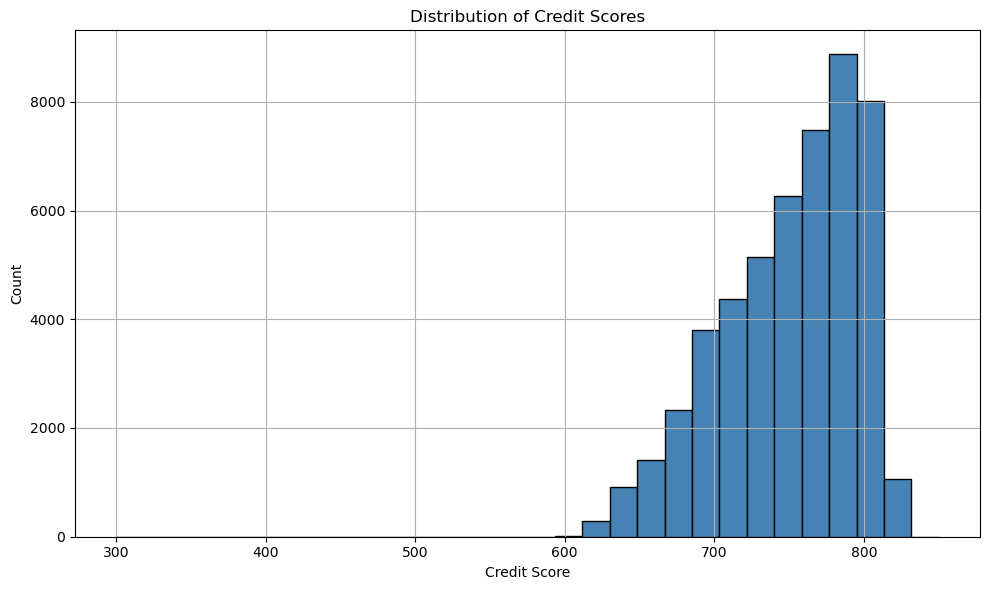

In [18]:
# Histogram of FICO Scores
plt.figure(figsize = (10,6))
source_df['credit_score'].hist(bins = 30, range = (300, 850), color = 'steelblue', edgecolor = 'black')
plt.title('Distribution of Credit Scores')
plt.xlabel('Credit Score')
plt.ylabel('Count')
plt.grid(True)
plt.tight_layout()
plt.show()

<h4>Result: For the 2021 data sample, most of the credit scores range ~ 750-800</h4>
<h4>This indicates that the borrowers can be classified as low-risk (could get lower interest rates, easier to qualify for credit cards)</h4>

<h4>Display a data table that only shows relevant columns </h4>
<h5>
    I simply reused my code from earlier, except the selected_columns line is to only look at the specified columns. <br>
    Notice: some of the rows have NaN - this is a mistake and needs to be resolved.
</h5>

In [19]:
# Retain the columns required for the analysis and display first 10 rows
selected_columns = ['credit_score', 'cltv_score','occupancy_rate']
selected_df = source_df[selected_columns]
display(selected_df.head(10))

,credit_score,cltv_score,occupancy_rate
0,746,76000.0,997
1,710,90000.0,50
2,722,353000.0,40
3,761,128000.0,50
4,200,47000.0,999
5,799,290000.0,18
6,785,NaN,30
7,692,185000.0,191
8,688,NaN,42
9,797,210000.0,35


<h4>Get rid of unrealistic or extraneous data </h4>
<h5>
    The NaN that was there in the previous data table is not here anymore
</h5>

In [20]:
# Drop rows where 'credit_score' is less than 350 or more than 850
credit_filtered_df = selected_df[(selected_df['credit_score'] >= 350) & (selected_df['credit_score'] <= 850)]

# Drop rows where 'occupency_rate' or 'cltv_score' are null
null_filtered_df = credit_filtered_df.dropna(subset=['occupancy_rate', 'cltv_score'])

# Drop rows where 'occupency_rate' is > 100
final_df = null_filtered_df[(null_filtered_df['occupancy_rate'] <= 100)]

display(final_df.head(10))

,credit_score,cltv_score,occupancy_rate
1,710,90000.0,50
2,722,353000.0,40
3,761,128000.0,50
5,799,290000.0,18
9,797,210000.0,35
10,716,335000.0,45
11,663,140000.0,35
12,720,160000.0,44
13,794,332000.0,29
14,769,164000.0,32


<h4>Fix the CLTV score to be more manageable as well as bucketing occupancy rate values into 4 categories </h4>
<h5>
    Even though invalid or bad data has been eliminated, now we have incomprehensible cltv scores like 335000. What does that even mean? <br><br>
    1) The first line enables Copy-On-Write for pandas Dataframes, which has the effect of improving performance and reduce memory usage when handling large datasets <br>
    2) The next 2 lines scale the entire cltv score ranges and compresses them all on a scale from 0-1 (makes it easier for comparison and comprehensibility) <br><br>
    The next step is to bucket the occupancy rate data and sort them into 4 categories - low, medium, high, very high. <br>
    pd.qcut is used to ensure equal number of observations in each bin - for quantile-based bins
</h5>

In [21]:
# Scale 'cltv_score' between 0 and 1 and round upto 2 decimal places
pd.options.mode.copy_on_write = True
scaler = MinMaxScaler(feature_range=(0, 1))
final_df['cltv_score_scaled'] = scaler.fit_transform(final_df[['cltv_score']]).round(2)

# Bucket 'occupency_rate' into 4 bins and label them
# Use pd.qcut for quantile-based bins to ensure approximately equal number of observations in each bin
bins = pd.qcut(final_df['occupancy_rate'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])
final_df['occupancy_rate_binned'] = bins

display(final_df.head(10))

,credit_score,cltv_score,occupancy_rate,cltv_score_scaled,occupancy_rate_binned
1,710,90000.0,50,0.04,Very High
2,722,353000.0,40,0.21,High
3,761,128000.0,50,0.07,Very High
5,799,290000.0,18,0.17,Low
9,797,210000.0,35,0.12,Medium
10,716,335000.0,45,0.20,Very High
11,663,140000.0,35,0.08,Medium
12,720,160000.0,44,0.09,Very High
13,794,332000.0,29,0.20,Medium
14,769,164000.0,32,0.09,Medium


<h4>Create a scatterplot based on the fully revised data table that measures Credit Score vs CLTV Score by Occupancy Rate </h4>
<h5>
    1) plt.figure codes the graph that the scatterplot occupies <br>
    2) The subsequent lines below code for the various aspects of the scatter plot (x-axis, y-axis, color, transparency, etc)
</h5>

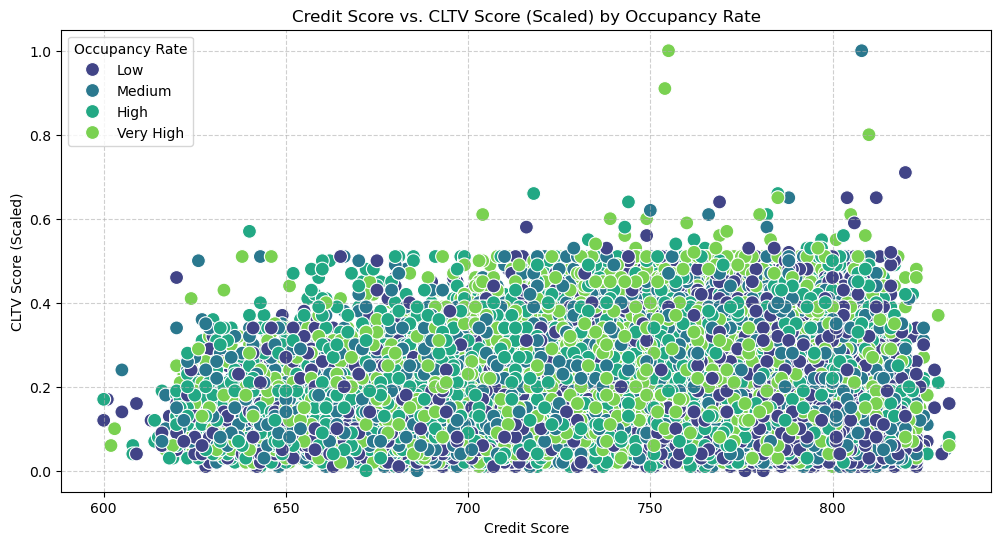

In [29]:
# Create the scatter plot
plt.figure(figsize = (12, 6))
sns.scatterplot(
    data = final_df,
    x = 'credit_score',
    y = 'cltv_score_scaled',
    hue = 'occupancy_rate_binned',
    palette = 'viridis',
    s = 100, # Adjust marker size
    alpha = 1.0 # Adjust transparency
)

plt.title('Credit Score vs. CLTV Score (Scaled) by Occupancy Rate')
plt.xlabel('Credit Score')
plt.ylabel('CLTV Score (Scaled)')
plt.grid(True, linestyle = '--', alpha = 0.6)
plt.legend(title = 'Occupancy Rate') 
plt.show()

<h4>Create a box plot that plots Original CLTV by Loan Purpose</h4> 
<h5>
    *This box plot compares the loan-to-value risk based on why the loan was taken*<br>      R - Refinance (No Cash Out), C - Refinance (Cash Out), B - Construction-to-Permanent loans <br><br>
    1) plt.figure line codes the graph that the box plot occupies <br>
    2) the elements of the creation of the box plot is on the next lines <br>
    3) next, the elements of the graph itself are on the next lines
</h5>

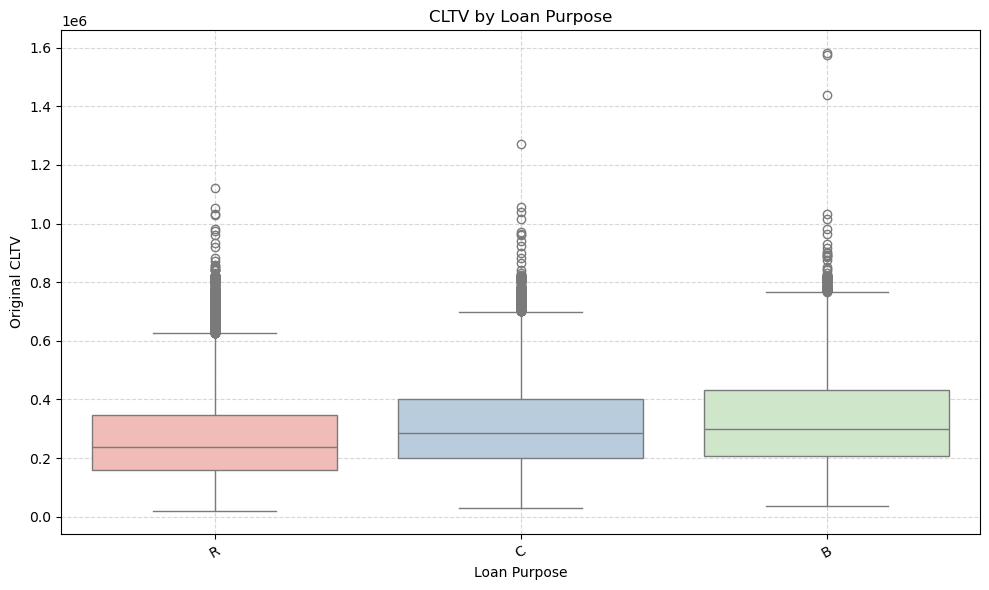

In [51]:
plt.figure(figsize = (10, 6))
sns.boxplot(
    data = final_df,
    x = 'purpose', 
    y = 'cltv_score',
    hue = 'purpose',
    palette = 'Pastel1',
    legend= False
)
plt.title('CLTV by Loan Purpose')
plt.xlabel('Loan Purpose')
plt.ylabel('Original CLTV')
plt.grid(True, linestyle = '--', alpha = 0.5)
plt.xticks(rotation = 30)
plt.tight_layout()
plt.show()

<h4>Create a scatter plot that plots Original debt-to-income ratio vs credit score</h4>
<h5>
    Essentially, we are comparing income burden vs borrower reliability <br>
    This scatter plot will tell us whether borrowers with high DTI ratios tend to have higher or lower credit scores - however, it is very clustered. <br> The first section creates the elements of the graph and the second section creates the title, x-axis, y-axis, and others.
    
</h5>

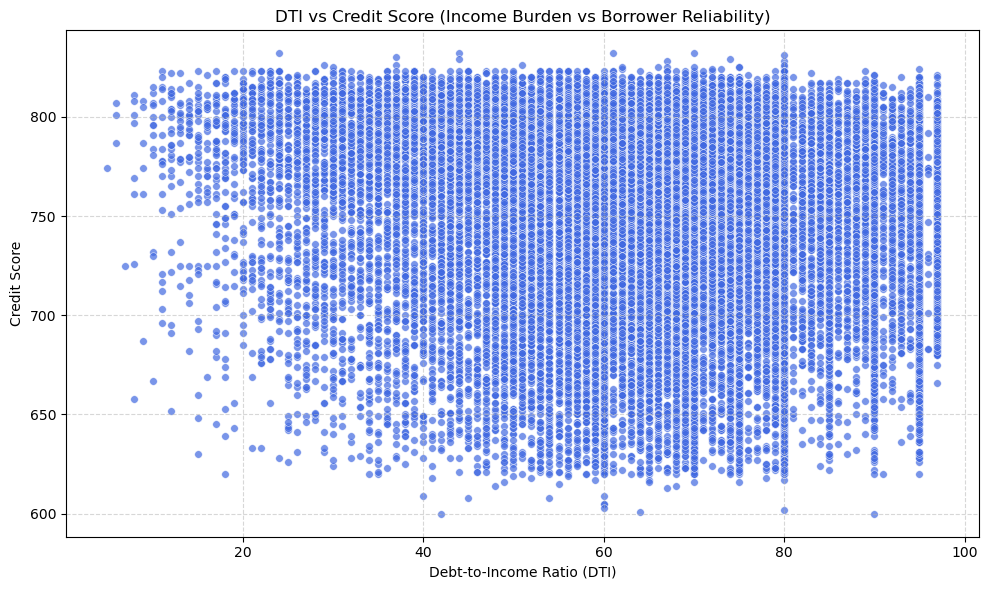

In [68]:
plt.figure(figsize = (10, 6))
sns.scatterplot(
    data = final_df,
    x = 'dti',
    y = 'credit_score', 
    alpha = 0.7,
    s = 30,
    color = 'royalblue'
)

plt.title('DTI vs Credit Score (Income Burden vs Borrower Reliability)')
plt.xlabel('Debt-to-Income Ratio (DTI)')
plt.ylabel('Credit Score')
plt.grid(True, linestyle = '--', alpha = 0.5)
plt.tight_layout()
plt.show()

<h4>The scatter plot is way too clustered. Create a hexbin which reduces cluster and a better way to visualize dense scatter plots. (Alternate version of scatter plot)</h4>
<h5>
    Before creating the hexbin, I filtered out unrealistic values. <br> Then the next lines of code creates the graph and elements of it. 
</h5>

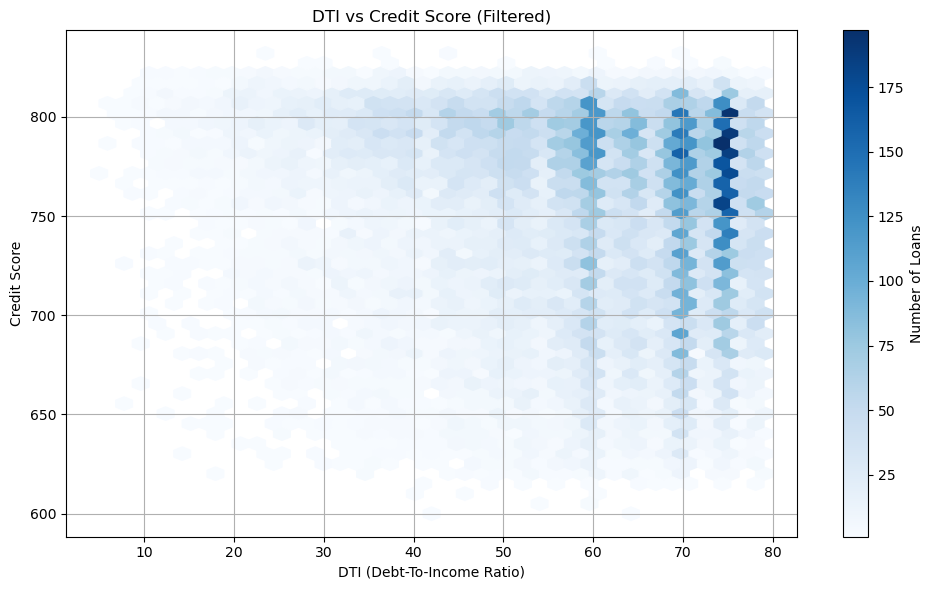

In [80]:
filtered_df = source_df[
    (source_df['dti'] < 80) & 
    (source_df['credit_score'] < 900) &
    (source_df['credit_score'] > 300)
]
plt.figure(figsize = (10, 6))
plt.hexbin(
    x = filtered_df['dti'],
    y = filtered_df['credit_score'],
    gridsize = 40,
    cmap = 'Blues',
    mincnt = 1
)

plt.colorbar(label = 'Number of Loans')
plt.xlabel('DTI (Debt-To-Income Ratio)')
plt.ylabel('Credit Score')
plt.title('DTI vs Credit Score (Filtered)')
plt.grid(True)
plt.tight_layout()
plt.show()

<h1>Result: The higher the DTI of the borrower, the higher their credit score is. In general</h1>

<h4>Create a bar plot that shows which state have the most borrowers</h4>
<h5>
    Kind of like the last graph, it's good to know where the borrowers reside in because then the applications of my research can be designated in certain states rather than the entire country 
</h5>

C:\Users\aadit\AppData\Local\Temp\ipykernel_24184\191271099.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = borrowers_by_state.values, y = borrowers_by_state.index, palette = 'viridis')


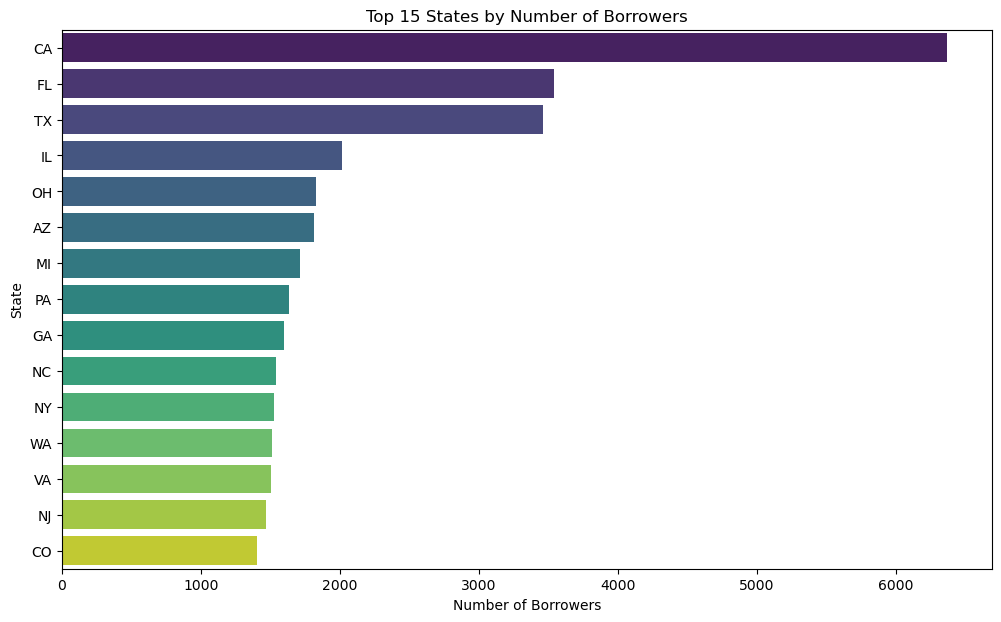

In [86]:
borrowers_by_state = final_df['state'].value_counts().head(15)
plt.figure(figsize = (12,7))
sns.barplot(x = borrowers_by_state.values, y = borrowers_by_state.index, palette = 'viridis')
plt.title('Top 15 States by Number of Borrowers')
plt.xlabel('Number of Borrowers')
plt.ylabel('State')
plt.show()

<h1>Result: Vast majority of the borrowers in the 2021 data sample are Californians</h1><h4>Notable amount of borrowers in Florida and Texas as well</h4>

<h4>Create a lollipop chart that depicts Average Credit Score by State (Top 15)</h4>
<h5>This will show if some states have borrowers with better/worse credit on average</h5>

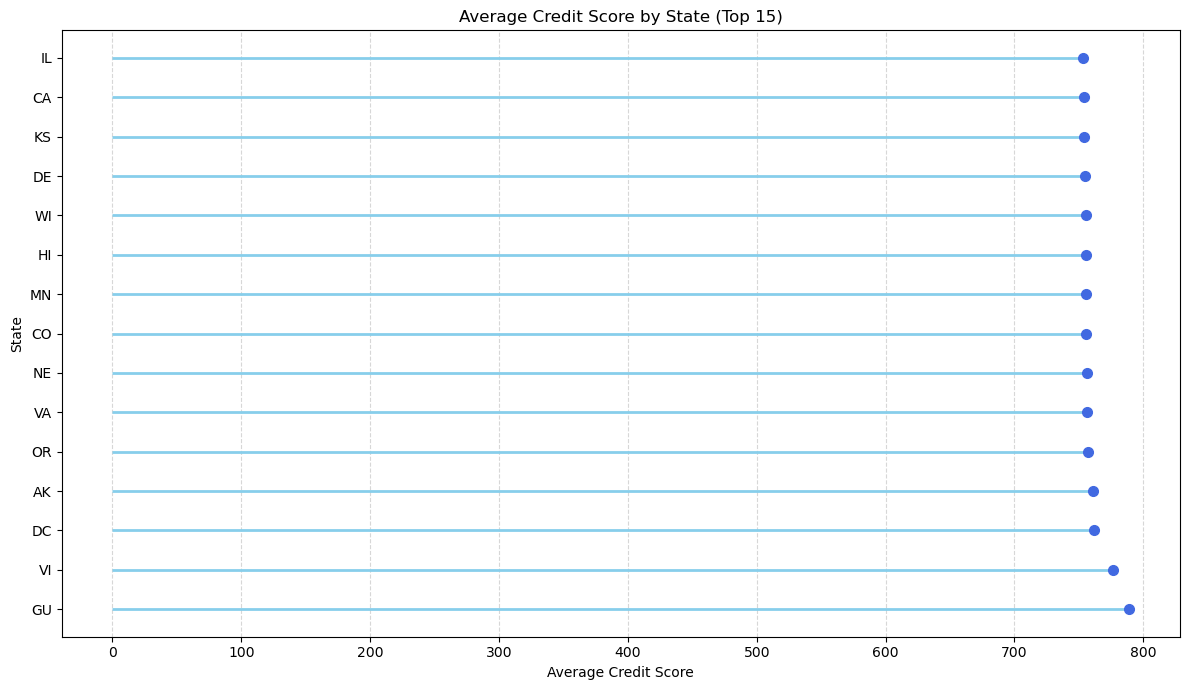

In [88]:
avg_credit_by_state = final_df.groupby('state')['credit_score'].mean().dropna().sort_values(ascending = False).head(15)

plt.figure(figsize = (12,7))
states = avg_credit_by_state.index
scores = avg_credit_by_state.values

# the stem lines
plt.hlines(y= states, xmin = 0, xmax = scores, color = 'skyblue', linewidth = 2)
# draw points
plt.plot(scores, states, "o", markersize = 7, color = 'royalblue')
plt.title('Average Credit Score by State (Top 15)')
plt.xlabel('Average Credit Score')
plt.ylabel('State')
plt.grid(axis = 'x', linestyle = '--', alpha = 0.5)
plt.tight_layout()
plt.show()

<h4> Create a pie chart to see how many borrowers are first-time homebuyers</h4>
<h5>
    It's good to understand the actual borrowers in the data (loan borrowers in 2021)<br>
    These lines of code generates the bar graph. N - no, Y - yes. obviously
</h5>

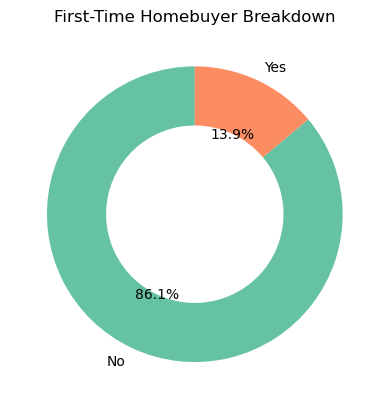

In [99]:
first_time_counts = final_df['flag'].value_counts()

labels = first_time_counts.index.map({'Y': 'Yes', 'N': 'No'})
sizes = first_time_counts.values
colors = ['#66c2a5', '#fc8d62'] # this is an optional custom color palette

fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(
    sizes,
    labels = labels,
    autopct = '%1.1f%%',
    startangle = 90,
    colors = colors,
    wedgeprops = dict(width = 0.4)
)

ax.set(aspect = 'equal', title = 'First-Time Homebuyer Breakdown')
plt.show()

<h1>Result: Most borrowers from the 2021 data sample are NOT first-time homebuyers</h1>

In [106]:
#print(final_df.columns)

In [107]:
#print('state' in final_df.columns)

In [104]:
#final_df['state'] = source_df['state']